<a href="https://colab.research.google.com/github/DarkWindman/DataAnalisys_Labs_2023/blob/main/lab2_intlel_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
df = pd.read_csv('/content/sample_data/data.csv')

In [81]:
df.columns


Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [82]:
df.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [83]:
X = df
y = df['whether he/she donated blood in March 2007']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

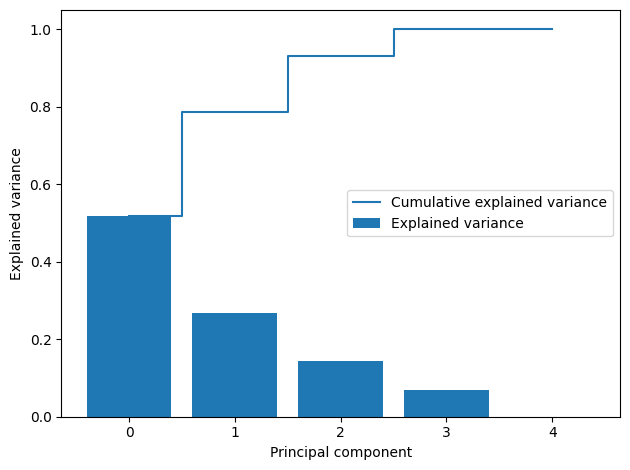

In [84]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

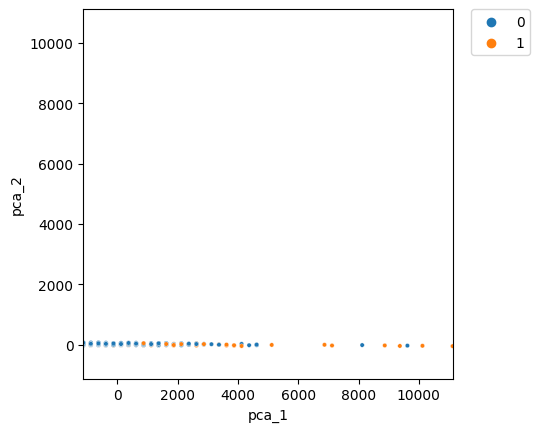

In [218]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

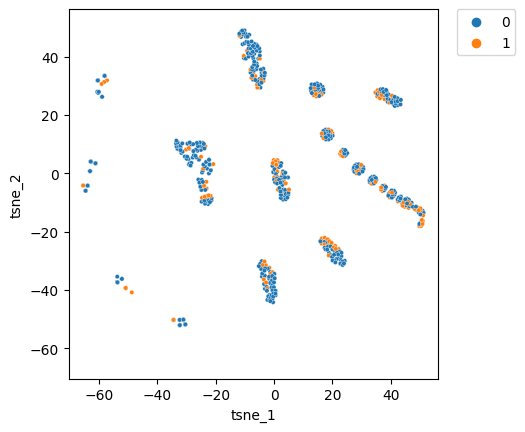

In [212]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

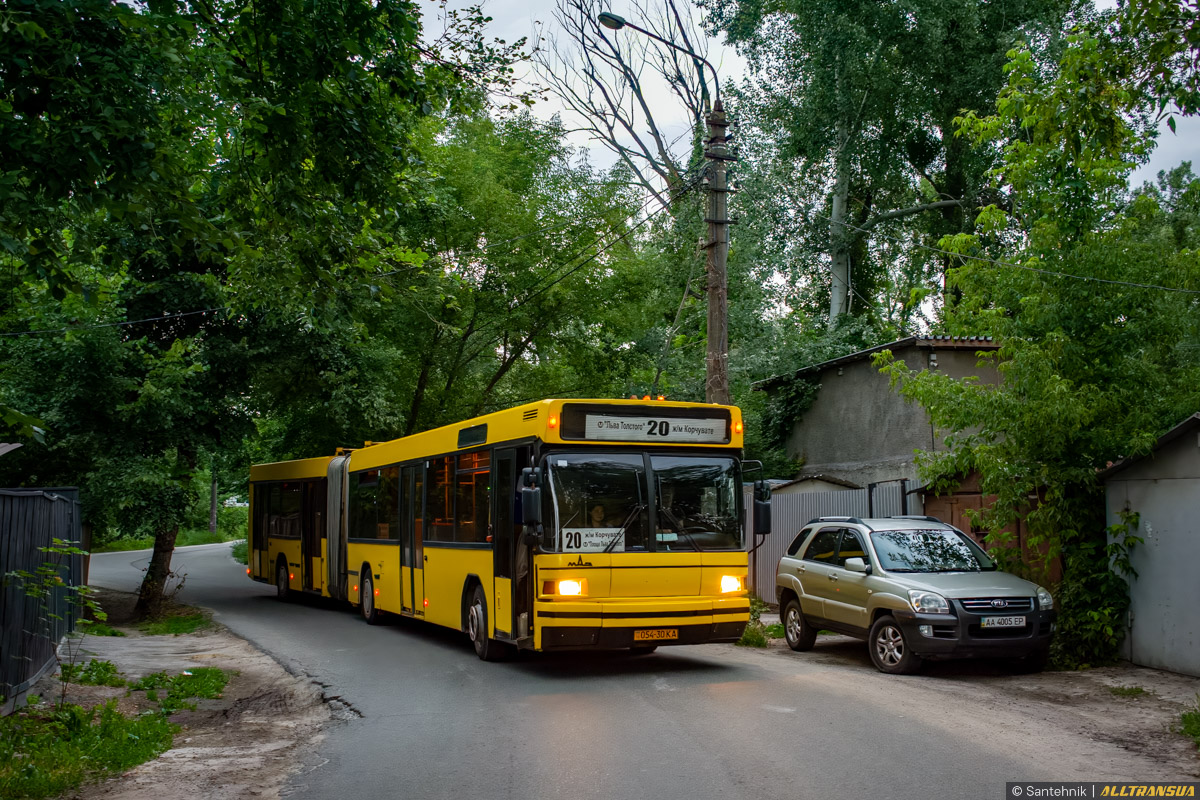

In [87]:
n_colors = 64
import cv2 as cv
from google.colab.patches import cv2_imshow
bus = cv.imread('bus.jpg')
cv2_imshow(bus)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1199.5, 799.5, -0.5)

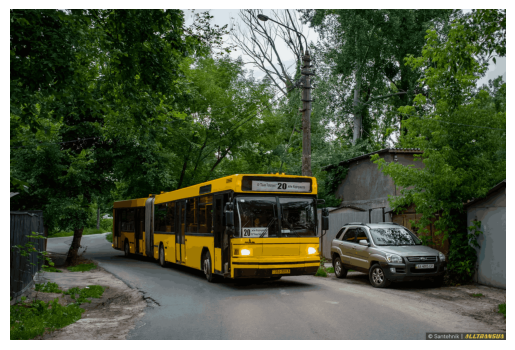

In [88]:

rep_bus = np.reshape(bus, ((bus.shape[0] * bus.shape[1]), 3))
model = KMeans(n_clusters=64)
target = model.fit_predict(rep_bus)
color_space = model.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (bus.shape[0], bus.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1199.5, 799.5, -0.5)

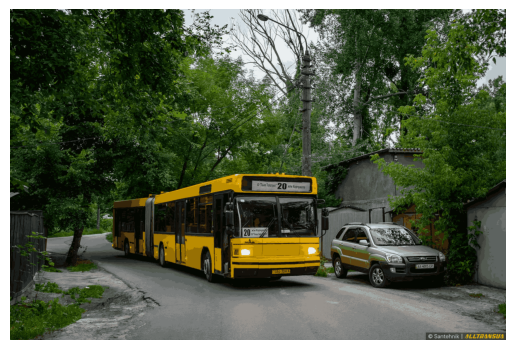

In [89]:
model = KMeans(n_clusters=32)
target = model.fit_predict(rep_bus)
color_space = model.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (bus.shape[0], bus.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1199.5, 799.5, -0.5)

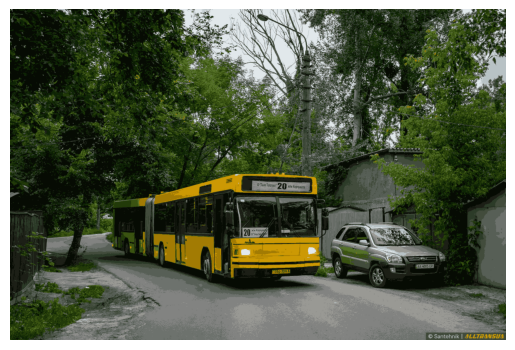

In [90]:
model = KMeans(n_clusters=16)
target = model.fit_predict(rep_bus)
color_space = model.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (bus.shape[0], bus.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 1199.5, 799.5, -0.5)

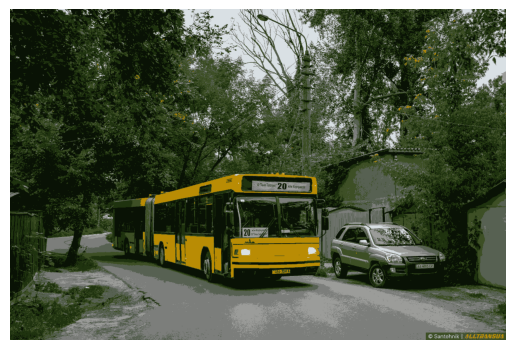

In [91]:
model = KMeans(n_clusters=8)
target = model.fit_predict(rep_bus)
color_space = model.cluster_centers_
output_image = np.reshape(color_space.astype("uint8")[target], (bus.shape[0], bus.shape[1], 3))
con_image = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)
plt.imshow(con_image)
plt.axis("off")

In [181]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [182]:
df1 = pd.read_csv('/content/sample_data/ireland-news-headlines.csv')

In [183]:
df1.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [ ]:
df1 = df1.drop('publish_date', axis = 1)
df1.head()

In [184]:
df2 = df1[0:50000]


In [185]:
from collections import Counter
Counter( df2['headline_category'])

Counter({'news': 24236,
         'culture': 3620,
         'opinion': 1769,
         'opinion.letters': 3134,
         'business': 6701,
         'sport': 8219,
         'news.health': 317,
         'news.education': 1016,
         'lifestyle.homes': 514,
         'news.politics.oireachtas': 473,
         'culture.media': 1})

In [137]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [188]:
for i in range (len(df2)):
  txt = df2.at[i, 'headline_text']
  txt = (re.sub("[^A-Za-z']+", ' ', str(txt)).lower())
  txt = ' '.join([word for word in txt.split(' ') if word not in stop_words])
  df2.at[i,'headline_text'] = txt


In [193]:
print(df2['headline_text'])

0                 uup sees possibility voting major
1              pubs targeted curbs smoking extended
2        papers reveal secret links o'neill cabinet
3          domestic chaos italy takes eu presidency
4                            learning star owe life
                            ...                    
49995                bakery pays premium stillorgan
49996           two infill housing sites go auction
49997               hughes hughes pays plus premium
49998                        gill sets new practice
49999                    fourth place finish erased
Name: headline_text, Length: 50000, dtype: object


In [195]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud

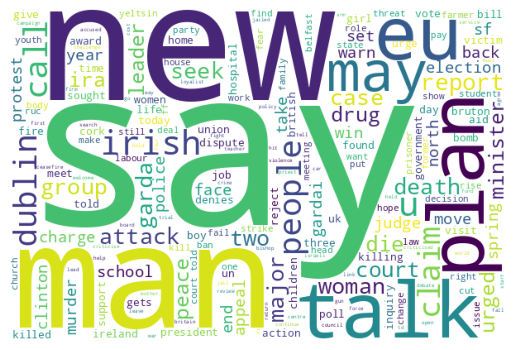

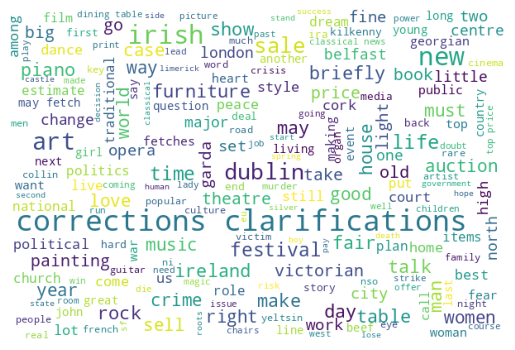

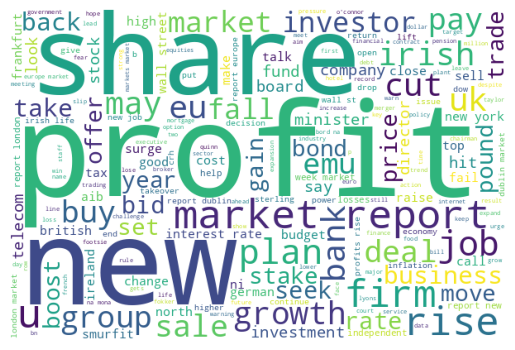

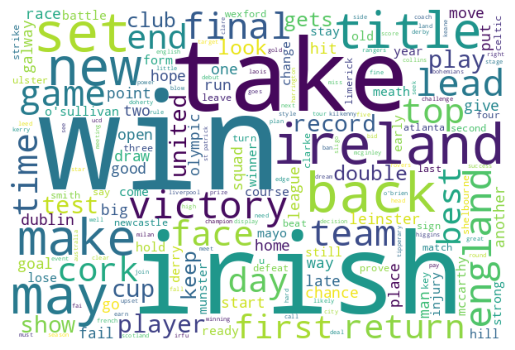

In [196]:
def visualize(label):
    text = ''
    for msg in df2[df2['headline_category'] == label]['headline_text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('news')
visualize('culture')
visualize('business')
visualize('sport')

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['headline_text'], df2['headline_category'], test_size=0.20)
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [201]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                business       0.72      0.74      0.73      1316
                 culture       0.43      0.33      0.38       729
         lifestyle.homes       0.70      0.65      0.68       107
                    news       0.74      0.82      0.78      4902
          news.education       0.37      0.26      0.30       215
             news.health       0.33      0.10      0.15        61
news.politics.oireachtas       0.22      0.14      0.17        94
                 opinion       0.45      0.23      0.31       358
         opinion.letters       0.50      0.30      0.38       603
                   sport       0.75      0.80      0.77      1615

                accuracy                           0.69     10000
               macro avg       0.52      0.44      0.46     10000
            weighted avg       0.67      0.69      0.68     10000



In [202]:
print(confusion_matrix(y_test, y_pred))

[[ 968   29   15  231    8    2    5    5   10   43]
 [  24  243    2  328   12    2    1   20   37   60]
 [  17    2   70   15    0    0    0    0    0    3]
 [ 229  188   11 4038   49    5   35   47   83  217]
 [  15   15    0   83   55    1    1    7   11   27]
 [   4    3    0   30    0    6    0    3    3   12]
 [   3    0    0   75    0    0   13    2    1    0]
 [  23   32    0  161    4    2    1   83   24   28]
 [  33   23    1  305    8    0    2    5  183   43]
 [  37   31    1  219   11    0    0   12   16 1288]]


In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(df2['headline_text'], df2['headline_category'], test_size=0.20)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df2['headline_text'])
x_train_Tfidf = Tfidf_vect.transform(X_train)
x_test_Tfidf = Tfidf_vect.transform(X_test)
print(x_test_Tfidf)

  (0, 3487)	0.38651723198162824
  (0, 3419)	0.3933042030425295
  (0, 2998)	0.38812189283484766
  (0, 2975)	0.20949440267349972
  (0, 1561)	0.35177122668382244
  (0, 1052)	0.4058536900765624
  (0, 955)	0.3327409849693858
  (0, 753)	0.31970759773785307
  (1, 2483)	0.519184887122688
  (1, 1536)	0.4575633859722724
  (1, 1378)	0.519184887122688
  (1, 1126)	0.50152752046562
  (2, 3776)	0.5486076005042617
  (2, 3614)	0.5529836342835411
  (2, 659)	0.41092957446391376
  (2, 323)	0.47368310684932596
  (3, 4840)	0.4149012447860956
  (3, 4794)	0.40308647981503204
  (3, 2772)	0.517517285080118
  (3, 2701)	0.41722833952911825
  (3, 2693)	0.4727310220435644
  (4, 4516)	0.5340962724620992
  (4, 509)	0.6856945763456751
  (4, 360)	0.4945342452370878
  (5, 3467)	0.3383157667701702
  :	:
  (9993, 3525)	0.460969718141161
  (9993, 3424)	0.3815489688843201
  (9993, 415)	0.4027945481549339
  (9994, 4979)	0.4173942406470129
  (9994, 3154)	0.4692448424904146
  (9994, 3064)	0.4144630927815216
  (9994, 1828)	0.42

In [208]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(x_train_Tfidf, y_train.ravel())
prediction = svc.predict(x_test_Tfidf)


print(confusion_matrix(y_test,prediction))

[[ 814    1    5  446    0    0    0    1    1   48]
 [  10  136    0  518    1    0    0    1    8   55]
 [  15    0   43   46    0    0    0    0    0    3]
 [ 104   28    2 4559    2    0    0    1   21  185]
 [  10    6    0  167   10    1    0    0    5   16]
 [   0    2    0   43    0    6    0    1    1    8]
 [   5    0    0   89    0    0    0    0    0    0]
 [  13   10    0  226    0    0    0   66   17   26]
 [  17   15    2  368    1    0    0    2  163   35]
 [  19    5    0  437    0    0    0    0    5 1149]]
